Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

Periodic functions are functions that repeat their values at regular intervals. Formally, a function f is periodic with period T if f(x+T) = f(x) for all x in its domain

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

For a sine function:

Amplitude: The maximum displacement from the center line

Frequency: The number of cycles per unit time

Wavelength: The distance between two consecutive peaks or troughs

Phase: The horizontal shift of the function

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

For complex arguments, sine and cosine are defined as:

cos(z) = (e^(iz) + e^(-iz)) / 2

sin(z) = (e^(iz) - e^(-iz)) / (2i)


This generalizes the real case by extending the domain to complex numbers while maintaining the fundamental properties and relationships of trigonometric functions

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

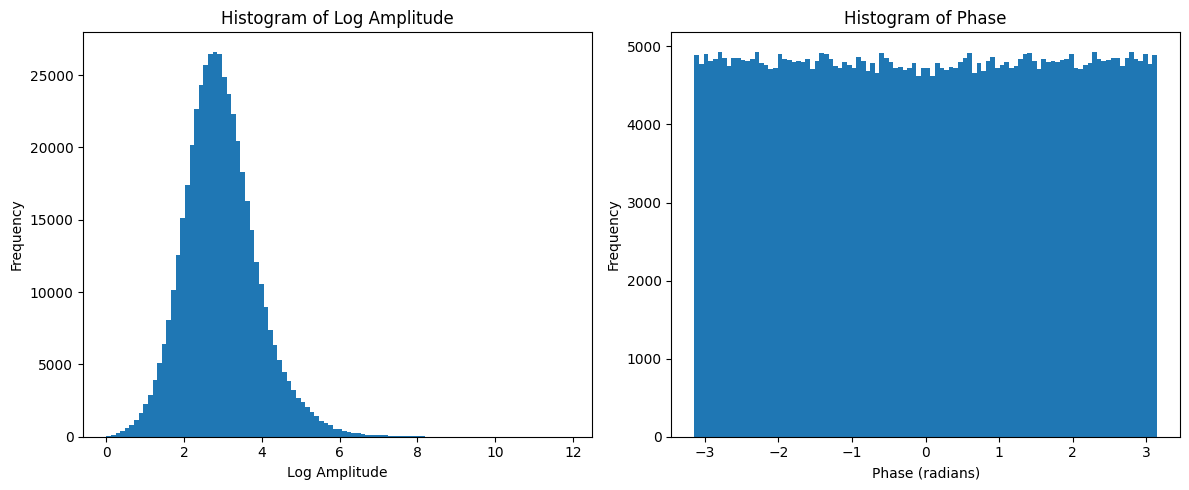

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/Users/positive-expectations/Downloads/images 2/dolly.png')

# Apply 2D Fourier transform
f = np.fft.fft2(img)

# Compute amplitude (magnitude) and phase
amplitude = np.abs(f)
phase = np.angle(f)

# Enhance contrast by taking logarithm of amplitude
log_amplitude = np.log(amplitude + 1)  # Add 1 to avoid log(0)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(log_amplitude.ravel(), bins=100, range=(0, np.max(log_amplitude)))
plt.title('Histogram of Log Amplitude')
plt.xlabel('Log Amplitude')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(phase.ravel(), bins=100, range=(-np.pi, np.pi))
plt.title('Histogram of Phase')
plt.xlabel('Phase (radians)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

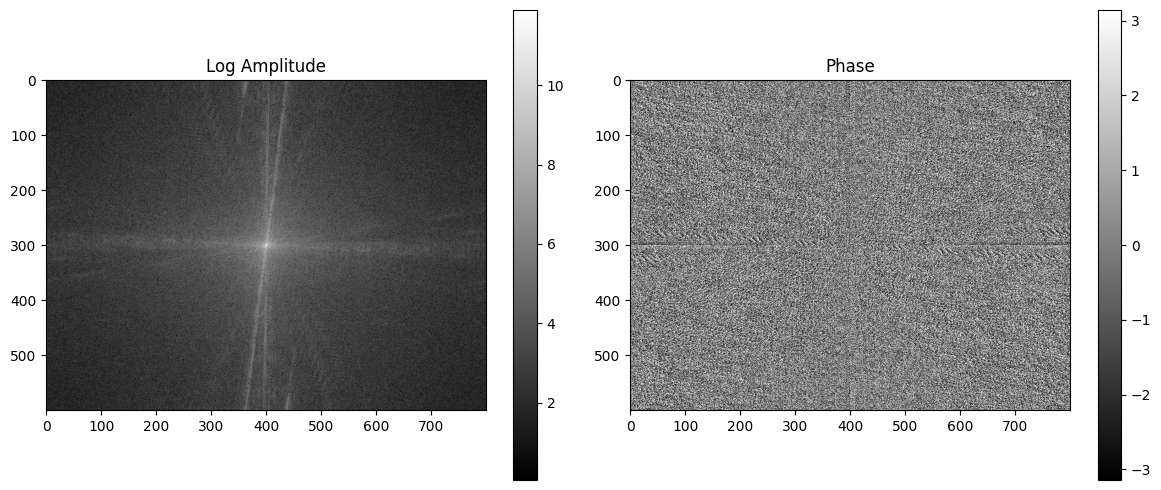

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/Users/positive-expectations/Downloads/images 2/dolly.png')

# Apply 2D Fourier transform
f = np.fft.fft2(img)

# Center the base frequency
f_shifted = np.fft.fftshift(f)

# Compute amplitude and phase
amplitude = np.abs(f_shifted)
phase = np.angle(f_shifted)

# Enhance contrast by taking logarithm of amplitude
log_amplitude = np.log(amplitude + 1)  # Add 1 to avoid log(0)

# Display amplitude and phase in separate images
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(log_amplitude, cmap='gray')
plt.title('Log Amplitude')
plt.colorbar()

plt.subplot(122)
plt.imshow(phase, cmap='gray')
plt.title('Phase')
plt.colorbar()

plt.tight_layout()
plt.show()


**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

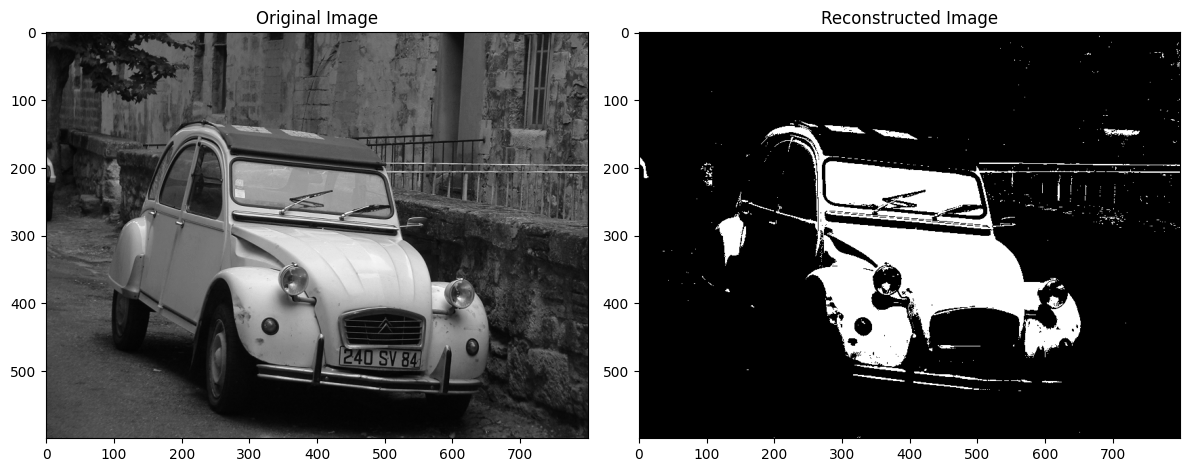

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#img_reconstructed = np.round(np.real(np.fft.ifft2(f))).astype(np.uint8)
#This will convert the reconstructed image back to the same data type as the original image, eliminating any potential artifacts from complex values.
img = plt.imread('/Users/positive-expectations/Downloads/images 2/dolly.png')

# Forward Fourier transform
f = np.fft.fft2(img)

# Inverse Fourier transform
img_reconstructed = np.round(np.real(np.fft.ifft2(f))).astype(np.uint8)

# Display original and reconstructed images
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(np.abs(img_reconstructed), cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()


Observations:

The reconstructed image should appear identical to the original image.
We use np.abs() to display the reconstructed image because the inverse Fourier transform may produce complex values due to numerical precision limitations.

If there are any discrepancies between the original and reconstructed images, they are likely due to floating-point precision errors. These errors are usually negligible and not visible to the human eye.
To ensure the reconstructed image is real-valued, you can use np.real() instead of np.abs(), or round the values to the nearest integer:
python

img_reconstructed = np.round(np.real(np.fft.ifft2(f))).astype(np.uint8)

This will convert the reconstructed image back to the same data type as the original image, eliminating any potential artifacts from complex values.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

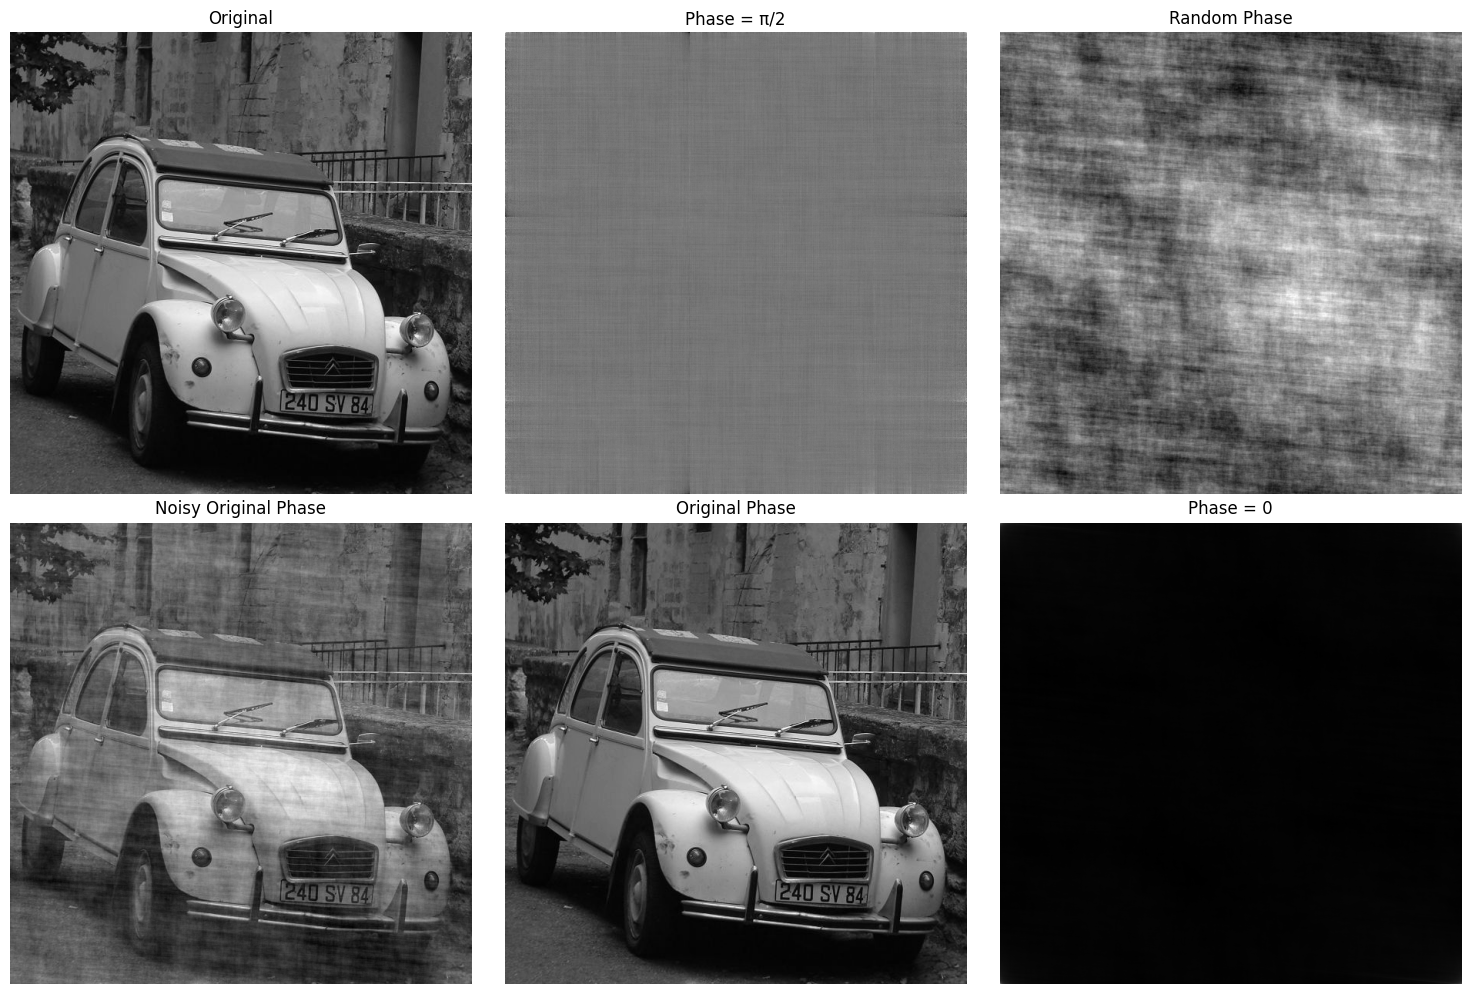

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/Users/positive-expectations/Downloads/images 2/dollySquared.jpg')

# Apply 2D Fourier transform
f = np.fft.fft2(img)

# Compute amplitude
amplitude = np.abs(f)

# Original phase
original_phase = np.angle(f)

# Function to reconstruct and display image
def reconstruct_and_display(phase, title):
    f_modified = amplitude * np.exp(1j * phase)
    img_reconstructed = np.fft.ifft2(f_modified).real
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

# Fixed phase values
reconstruct_and_display(np.zeros_like(original_phase), 'Phase = 0')
plt.sca(axs[0, 1])

reconstruct_and_display(np.full_like(original_phase, np.pi/2), 'Phase = π/2')
plt.sca(axs[0, 2])

# Random phase
random_phase = np.random.uniform(0, 2*np.pi, original_phase.shape)
reconstruct_and_display(random_phase, 'Random Phase')
plt.sca(axs[1, 0])

# Noisy version of original phase
noise = np.random.normal(0, 0.5, original_phase.shape)
noisy_phase = original_phase + noise
reconstruct_and_display(noisy_phase, 'Noisy Original Phase')
plt.sca(axs[1, 1])

# Original phase (for comparison)
reconstruct_and_display(original_phase, 'Original Phase')
plt.sca(axs[1, 2])

plt.tight_layout()
plt.show()


**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


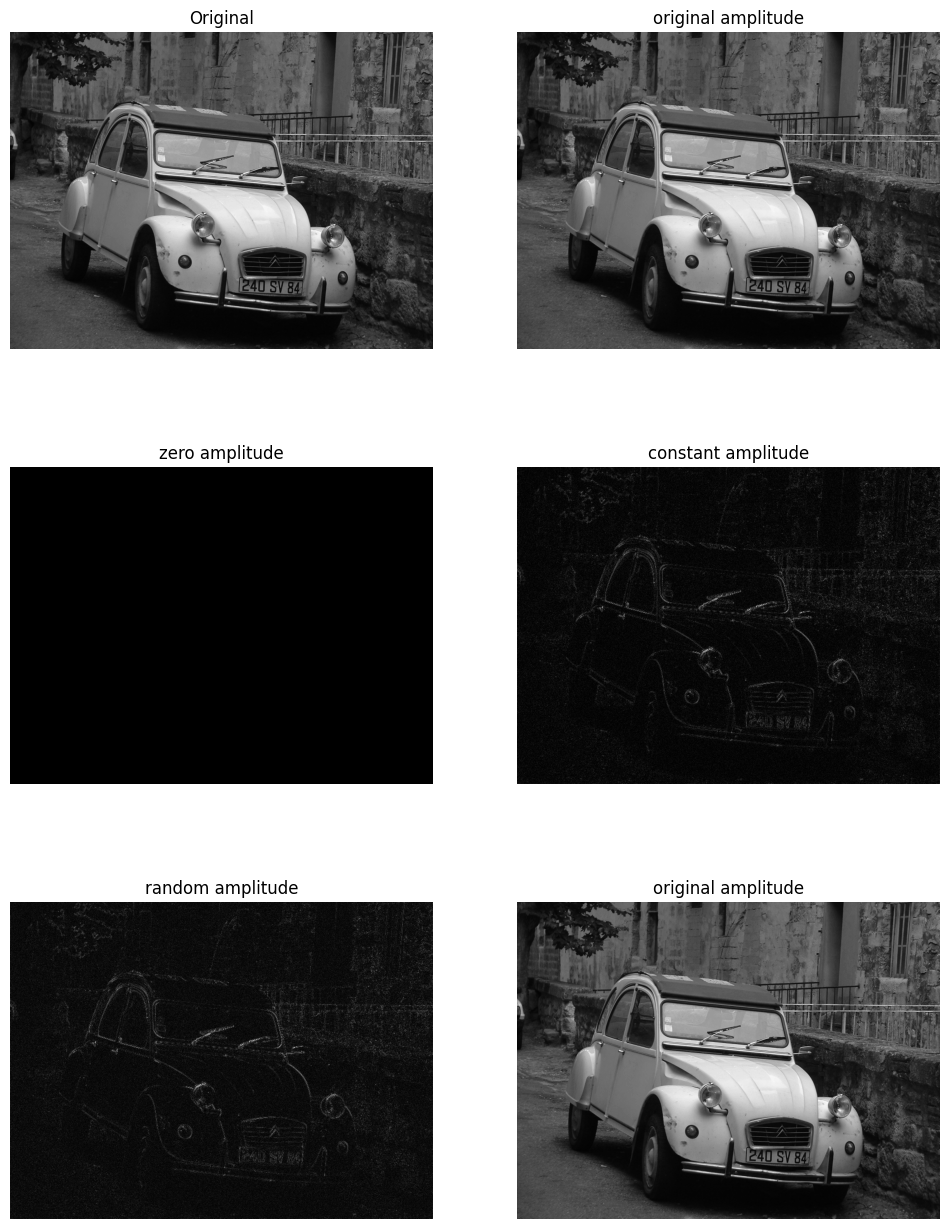

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('/Users/positive-expectations/Downloads/images 2/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

Explanation of results:

Original amplitude: This should reproduce the original image, as we're using both the original amplitude and phase.
Zero amplitude: This will result in a blank (black) image, as all frequency components are set to zero.

Constant amplitude: This will produce an image that preserves the edges and overall structure of the original image, but with reduced detail and contrast. The constant amplitude emphasizes all frequencies equally, which tends to highlight edges and lose finer details.

Random amplitude: This will create a noisy image that retains some structure from the original due to the preserved phase information. The image will likely be recognizable but heavily distorted.

Noisy amplitude: This should produce an image similar to the original but with added noise. The level of distortion will depend on the amount of noise added to the amplitude.

These results demonstrate that while phase information is crucial for preserving the structure and recognizability of an image, amplitude information is important for determining the strength of different frequency components, which affects the image's contrast and detail.

The phase carries information about the relative positions of different frequency components, which is why preserving phase often maintains the overall structure of the image. Amplitude, on the other hand, determines the strength or prominence of these frequency components.

This experiment illustrates the complementary roles of amplitude and phase in the Fourier representation of images, and how manipulating each affects the reconstructed image in different ways.

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

**SOLUTION** The Fourier transform is a mathematical technique that decomposes a signal or function into its constituent frequencies. It transforms a signal from its original domain (usually time or space) to a representation in the frequency domain.

The frequency space, also known as the Fourier domain, is the result of this transformation. In this space, each point represents a particular frequency component of the original signal. Specifically:

For time-domain signals, a point in frequency space represents a temporal frequency (cycles per unit time).

For spatial signals, a point represents a spatial frequency or wavenumber (cycles per unit distance).

The magnitude of each point in frequency space indicates the strength or prominence of that particular frequency in the original signal, while its phase represents the timing or spatial positioning of that frequency component

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

**SOLUTION** To implement a one-dimensional discrete Fourier transform (DFT) using the given formula, we can use the following Python code:

In [11]:
import numpy as np

def dft_1d(f):
    L = len(f)
    c = np.zeros(L, dtype=complex)
    for n in range(L):
        for x in range(L):
            c[n] += f[x] * np.exp(-2j * np.pi * n * x / L)
    return c

Note that this implementation has a time complexity of O(N^2), where N is the length of the input signal. For larger inputs, it's more efficient to use the Fast Fourier Transform (FFT) algorithm, which has a complexity of O(N log N)

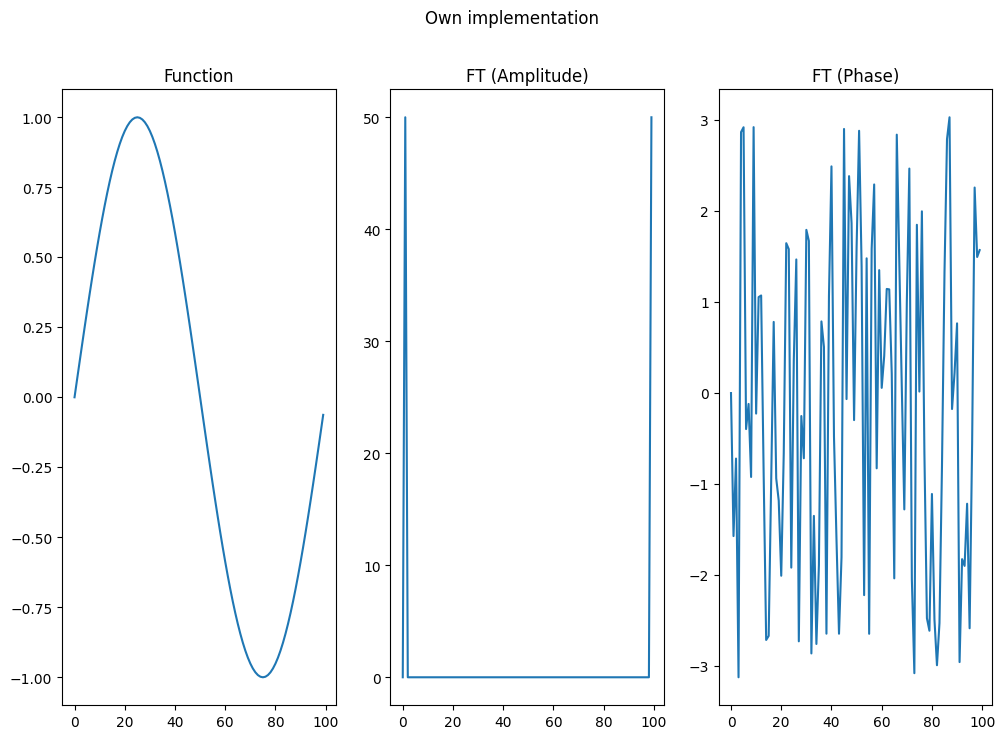

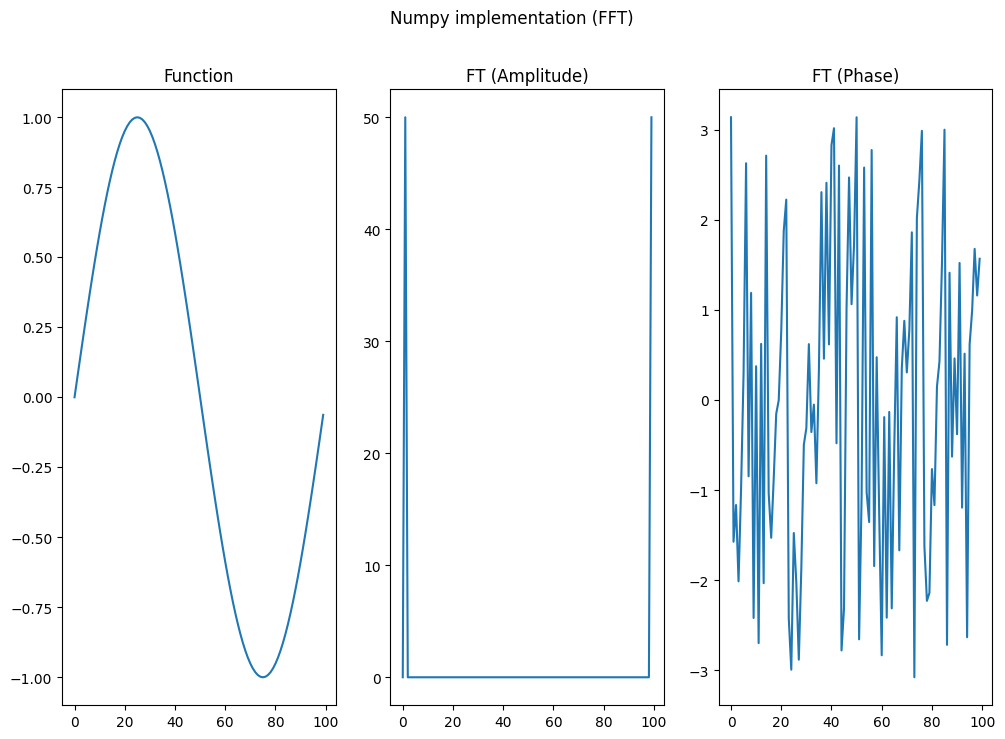

In [12]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    L = len(func)
    ft = np.zeros(func.shape, dtype=complex)

    for n in range(L):
        for x in range(L):
            ft[n] += func[x] * np.exp(-2j * np.pi * n * x / L)

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()


**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

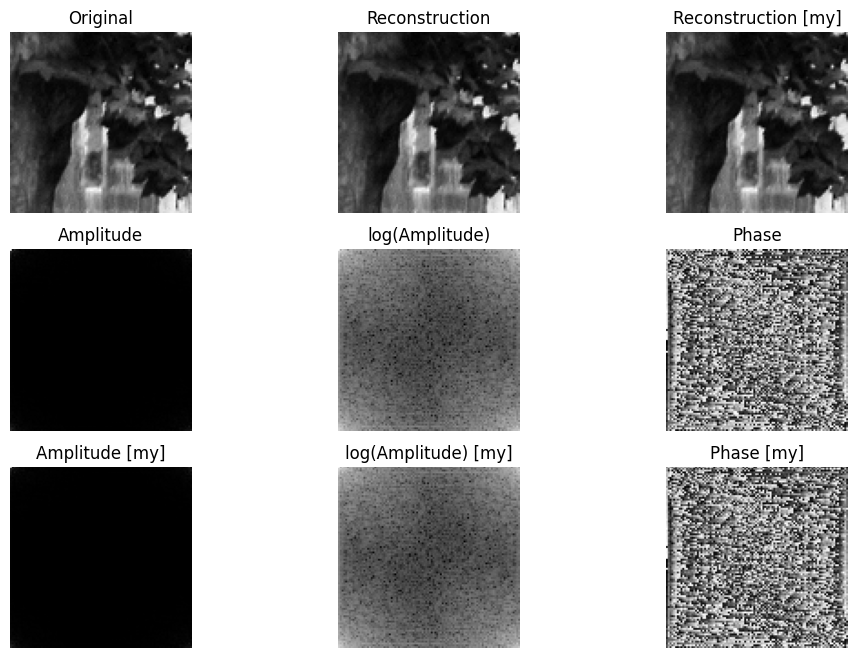

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
        ndarray: Fourier transformed image (complex values).
    """
    rows, cols = img.shape
    ft = np.zeros((rows, cols), dtype=complex)

    for u in range(rows):
        for v in range(cols):
            sum_val = 0
            for x in range(rows):
                for y in range(cols):
                    sum_val += img[x, y] * np.exp(-2j * np.pi * ((u * x / rows) + (v * y / cols)))
            ft[u, v] = sum_val

    return ft

# Now (visually) compare your results with np.fft.fft2
img = plt.imread('/Users/positive-expectations/Downloads/images 2/dolly.png')

# Use a smaller part of the image for development
img = img[:100, :100]  # Adjust size as needed

# NumPy FFT2
ft_np = np.fft.fft2(img)
amplitude = np.abs(ft_np)
phase = np.angle(ft_np)
restore = np.abs(np.fft.ifft2(ft_np))

# Custom 2D Fourier Transform
ft_custom = fourier2d(img)
my_amplitude = np.abs(ft_custom)
my_phase = np.angle(ft_custom)
my_restore = np.abs(np.fft.ifft2(ft_custom))

plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.show()


## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

The convolution theorem states that the Fourier transform of a convolution of two functions is equal to the product of their individual Fourier transforms. Practically, this means complex convolutions can be simplified by performing Fourier transforms, multiplying in the frequency domain, and then applying an inverse Fourier transform.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

From a Fourier analysis perspective, the natural way to deal with boundary pixels is to assume periodic boundary conditions. This means the image is treated as if it were tiled infinitely in all directions, which aligns with the periodic nature of the Fourier transform.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


Using the convolution theorem, the complexity of computing a convolution is O(N log N) for an N x N image, due to the Fast Fourier Transform (FFT) algorithm. This is significantly faster than the O(N^2 * M^2) complexity for direct convolution of an N x N image with an M x M kernel, as discussed in sheet 01, Assignment 1(c).

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

Here is the transformed proof presented in the desired concise and clear language style:

---

\[
\mathcal{F}[f \ast h](u, v)
= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1} (f \ast h)(x, y) \cdot e^{-\operatorname{i}2\pi \left( u\frac{x}{M} + v\frac{y}{N} \right)} 
\]

By the definition of convolution:
\[
(f \ast h)(x, y) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x-m, y-n).
\]

Substituting:
\[
\mathcal{F}[f \ast h](u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} \left( \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x-m, y-n) \right) \cdot e^{-\operatorname{i}2\pi \left( u\frac{x}{M} + v\frac{y}{N} \right)}.
\]

Reordering summations:
\[
\mathcal{F}[f \ast h](u, v) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot \left( \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} h(x-m, y-n) \cdot e^{-\operatorname{i}2\pi \left( u\frac{x}{M} + v\frac{y}{N} \right)} \right).
\]

Change of variables \( x' = x-m \), \( y' = y-n \):
\[
\sum_{x=0}^{M-1} \sum_{y=0}^{N-1} h(x-m, y-n) \cdot e^{-\operatorname{i}2\pi \left( u\frac{x}{M} + v\frac{y}{N} \right)} 
= \sum_{x'=0}^{M-1} \sum_{y'=0}^{N-1} h(x', y') \cdot e^{-\operatorname{i}2\pi \left( u\frac{x'+m}{M} + v\frac{y'+n}{N} \right)}.
\]

Factoring the exponent:
\[
e^{-\operatorname{i}2\pi \left( u\frac{x'+m}{M} + v\frac{y'+n}{N} \right)} = e^{-\operatorname{i}2\pi \left( u\frac{x'}{M} + v\frac{y'}{N} \right)} \cdot e^{-\operatorname{i}2\pi \left( u\frac{m}{M} + v\frac{n}{N} \right)}.
\]

Thus:
\[
\sum_{x=0}^{M-1} \sum_{y=0}^{N-1} h(x-m, y-n) \cdot e^{-\operatorname{i}2\pi \left( u\frac{x}{M} + v\frac{y}{N} \right)}
= e^{-\operatorname{i}2\pi \left( u\frac{m}{M} + v\frac{n}{N} \right)} \cdot \mathcal{F}[h](u, v).
\]

Substituting back:
\[
\mathcal{F}[f \ast h](u, v) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot e^{-\operatorname{i}2\pi \left( u\frac{m}{M} + v\frac{n}{N} \right)} \cdot \mathcal{F}[h](u, v).
\]

Recognizing the Fourier Transform of \( f \):
\[
\mathcal{F}[f \ast h](u, v) = \mathcal{F}[f](u, v) \cdot \mathcal{F}[h](u, v).
\]